In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Mini Project(Phishing_URL_Detection)/preprocessed.csv")
df.head()

,Unnamed: 0,is_ip,islength,is_shorten,at_in_url,dslash,is_sport,is_hyphen,ndots,scheme,...,nlinks,countm,get_certificate_age,check_certificate_validity,get_domain_details,page_rank,name_servers,ssl_check,q_params,label
0,0,-1,1,-1,-1,-1,-1.0,1,0,1,...,53,11,364,0,-1,-1.00,-1,1,1,0
1,1,-1,1,-1,-1,-1,-1.0,1,1,-1,...,152,14,396,0,0,4.60,10,1,1,0
2,2,-1,0,-1,-1,-1,-1.0,-1,1,-1,...,74,5,89,1,-1,-1.00,-1,1,1,0
3,3,-1,-1,-1,-1,-1,-1.0,1,0,-1,...,362,16,-1,-1,1,5.05,2,1,1,0
4,4,-1,-1,-1,-1,-1,-1.0,-1,1,-1,...,0,2,396,0,-1,-1.00,3,1,1,0


In [3]:
df.shape

(80997, 33)

In [4]:
df = df.drop("Unnamed: 0",axis=1)

In [5]:
df.head()

,is_ip,islength,is_shorten,at_in_url,dslash,is_sport,is_hyphen,ndots,scheme,mform,...,nlinks,countm,get_certificate_age,check_certificate_validity,get_domain_details,page_rank,name_servers,ssl_check,q_params,label
0,-1,1,-1,-1,-1,-1.0,1,0,1,1,...,53,11,364,0,-1,-1.00,-1,1,1,0
1,-1,1,-1,-1,-1,-1.0,1,1,-1,1,...,152,14,396,0,0,4.60,10,1,1,0
2,-1,0,-1,-1,-1,-1.0,-1,1,-1,0,...,74,5,89,1,-1,-1.00,-1,1,1,0
3,-1,-1,-1,-1,-1,-1.0,1,0,-1,0,...,362,16,-1,-1,1,5.05,2,1,1,0
4,-1,-1,-1,-1,-1,-1.0,-1,1,-1,1,...,0,2,396,0,-1,-1.00,3,1,1,0


In [6]:
df.dropna(inplace=True)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_ip,80593.0,-0.985855,0.167602,-1.0,-1.0,-1.0,-1.0,1.0
islength,80593.0,-0.249513,0.912596,-1.0,-1.0,-1.0,1.0,1.0
is_shorten,80593.0,-0.994367,0.105995,-1.0,-1.0,-1.0,-1.0,1.0
at_in_url,80593.0,-0.959823,0.280609,-1.0,-1.0,-1.0,-1.0,1.0
dslash,80593.0,-0.984788,0.173763,-1.0,-1.0,-1.0,-1.0,1.0
is_sport,80593.0,-0.999404,0.034508,-1.0,-1.0,-1.0,-1.0,1.0
is_hyphen,80593.0,0.023885,0.999721,-1.0,-1.0,1.0,1.0,1.0
ndots,80593.0,0.284442,0.709589,-1.0,0.0,0.0,1.0,1.0
scheme,80593.0,0.155510,0.987840,-1.0,-1.0,1.0,1.0,1.0
mform,80593.0,0.179581,0.864835,-1.0,-1.0,0.0,1.0,1.0


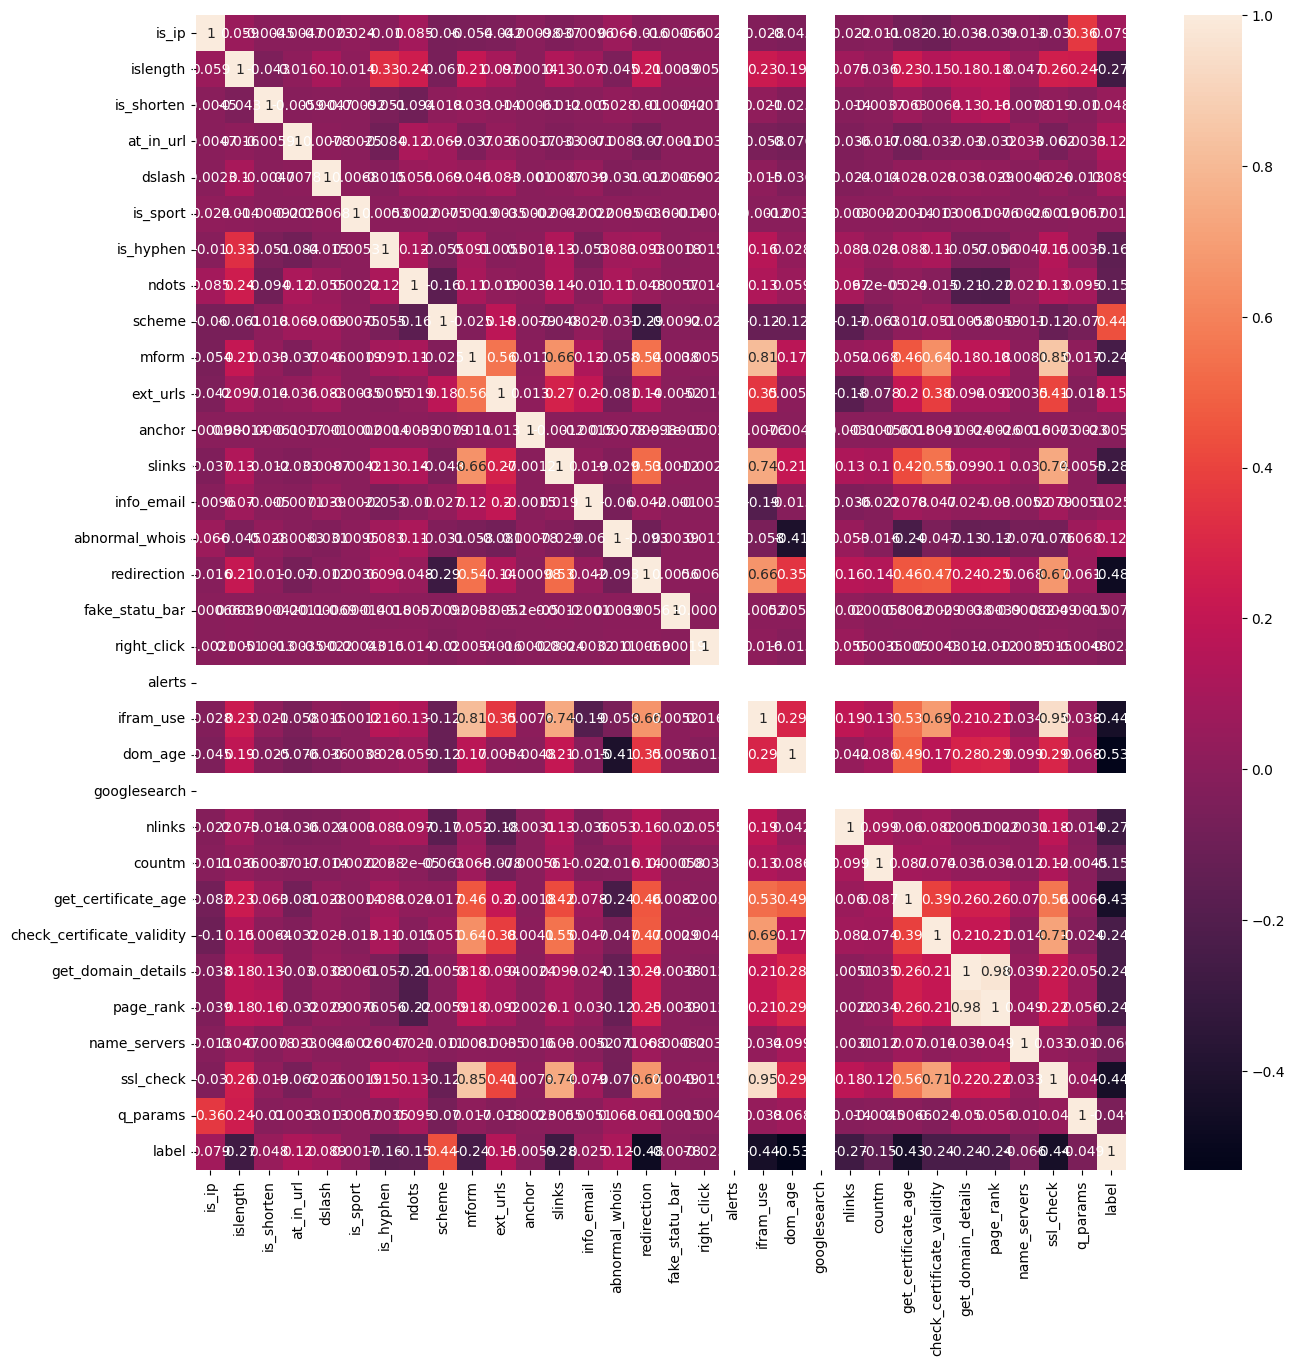

In [8]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

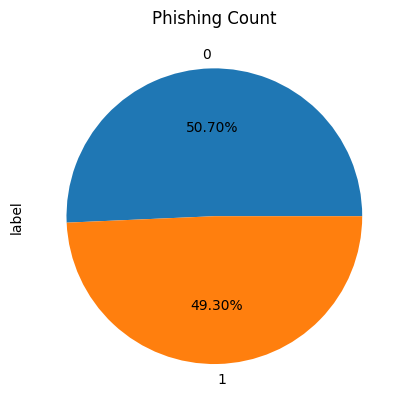

In [9]:
# Phishing Count in pie chart

df['label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [10]:
# Splitting the dataset into dependant and independant fetature

X = df.drop(["label"],axis =1)
y = df["label"]

In [11]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((64474, 31), (64474,), (16119, 31), (16119,))

## Model Building & Training:

In [12]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [13]:
X_train = X_train.dropna()

In [14]:
y_train = y_train.dropna()

## Logistic Regression

In [15]:
# Linear regression model
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model
log.fit(X_train,y_train)

LogisticRegression()

In [16]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [17]:
len(y_train_log)

64474

In [18]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.903
Logistic Regression : Accuracy on test Data: 0.908

Logistic Regression : f1_score on training Data: 0.902
Logistic Regression : f1_score on test Data: 0.909

Logistic Regression : Recall on training Data: 0.917
Logistic Regression : Recall on test Data: 0.921

Logistic Regression : precision on training Data: 0.888
Logistic Regression : precision on test Data: 0.898


In [69]:
# import seaborn as sns
# #define the predictor variable and the response variable
# x = df['dom_age']
# y = df['label']

# #plot logistic regression curve
# sns.regplot(x=x, y=y, data=df, logistic=True, ci=None)

In [20]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      8019
           1       0.90      0.92      0.91      8100

    accuracy                           0.91     16119
   macro avg       0.91      0.91      0.91     16119
weighted avg       0.91      0.91      0.91     16119



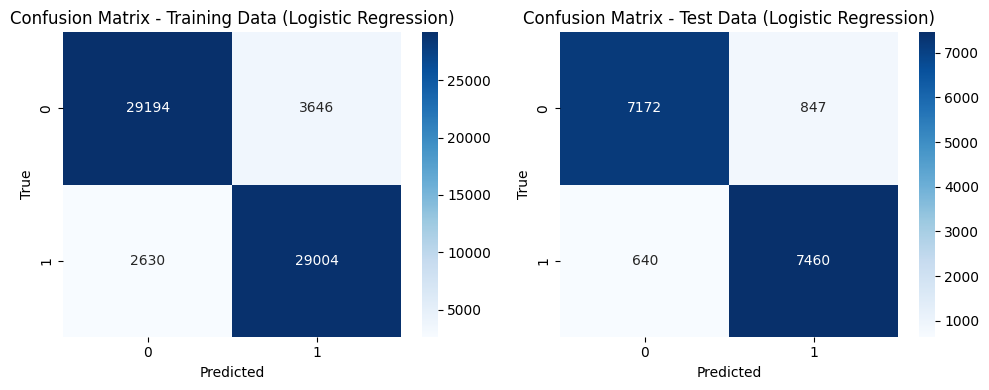

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_log, classes=['0', '1'], title='Confusion Matrix - Training Data (Logistic Regression)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_log, classes=['0', '1'], title='Confusion Matrix - Test Data (Logistic Regression)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [22]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

##  K-Nearest Neighbors : Classifier

In [23]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [24]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [25]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.996
K-Nearest Neighbors : Accuracy on test Data: 0.978

K-Nearest Neighbors : f1_score on training Data: 0.996
K-Nearest Neighbors : f1_score on test Data: 0.978

K-Nearest Neighborsn : Recall on training Data: 0.996
Logistic Regression : Recall on test Data: 0.975

K-Nearest Neighbors : precision on training Data: 0.996
K-Nearest Neighbors : precision on test Data: 0.982


In [26]:
print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      8019
           1       0.98      0.98      0.98      8100

    accuracy                           0.98     16119
   macro avg       0.98      0.98      0.98     16119
weighted avg       0.98      0.98      0.98     16119



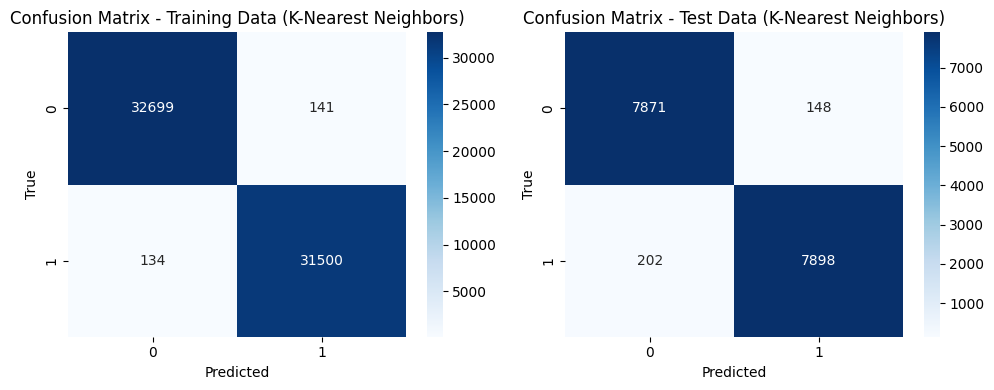

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_knn, classes=['0', '1'], title='Confusion Matrix - Training Data (K-Nearest Neighbors)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_knn, classes=['0', '1'], title='Confusion Matrix - Test Data (K-Nearest Neighbors)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


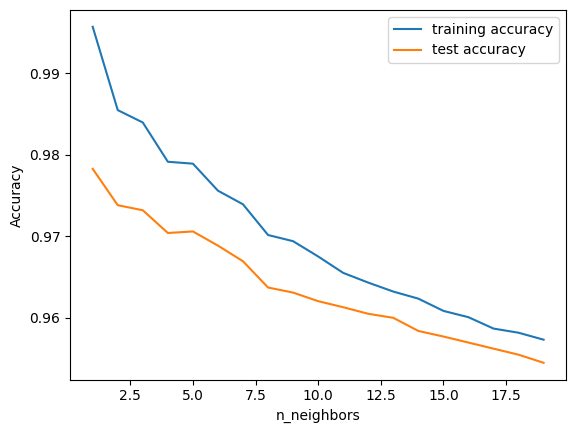

In [70]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend();

In [29]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## Decision Trees : Classifier

In [30]:
# Decision Tree Classifier model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth=30)

# fit the model
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [31]:
y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [32]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.997
Decision Tree : Accuracy on test Data: 0.977

Decision Tree : f1_score on training Data: 0.997
Decision Tree : f1_score on test Data: 0.977

Decision Tree : Recall on training Data: 0.999
Decision Tree : Recall on test Data: 0.976

Decision Tree : precision on training Data: 0.996
Decision Tree : precision on test Data: 0.978


In [33]:
print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8019
           1       0.98      0.98      0.98      8100

    accuracy                           0.98     16119
   macro avg       0.98      0.98      0.98     16119
weighted avg       0.98      0.98      0.98     16119



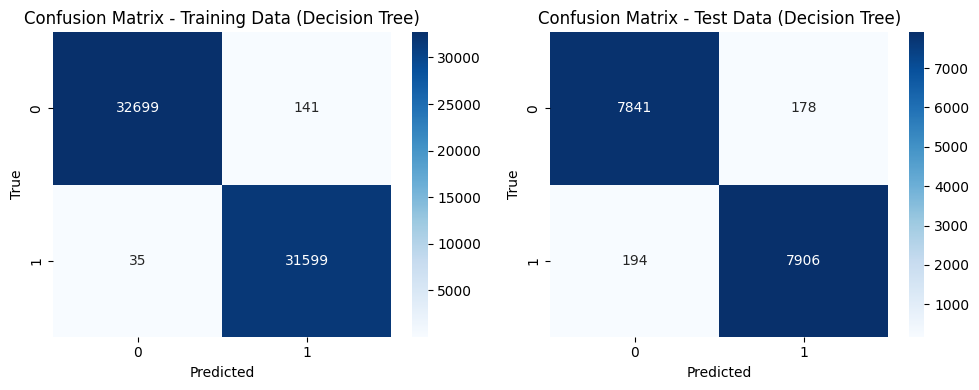

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_tree, classes=['0', '1'], title='Confusion Matrix - Training Data (Decision Tree)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_tree, classes=['0', '1'], title='Confusion Matrix - Test Data (Decision Tree)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [35]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree Classifier',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

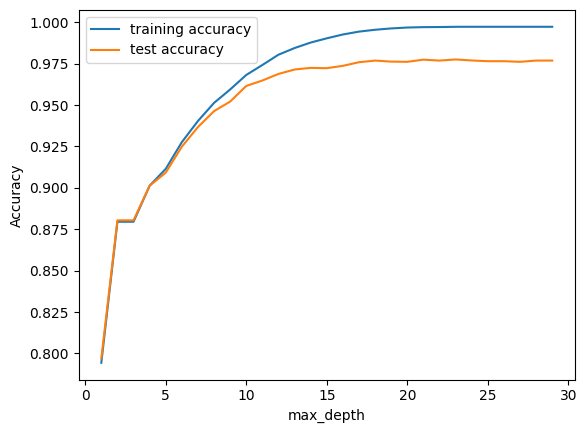

In [74]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

## Random Forest : Classifier

In [37]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=15)

# fit the model
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=15)

In [38]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [39]:
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_forest)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.997
Random Forest : Accuracy on test Data: 0.981

Random Forest : f1_score on training Data: 0.997
Random Forest : f1_score on test Data: 0.981

Random Forest : Recall on training Data: 0.998
Random Forest : Recall on test Data: 0.979

Random Forest : precision on training Data: 0.995
Random Forest : precision on test Data: 0.984


In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8019
           1       0.98      0.98      0.98      8100

    accuracy                           0.98     16119
   macro avg       0.98      0.98      0.98     16119
weighted avg       0.98      0.98      0.98     16119



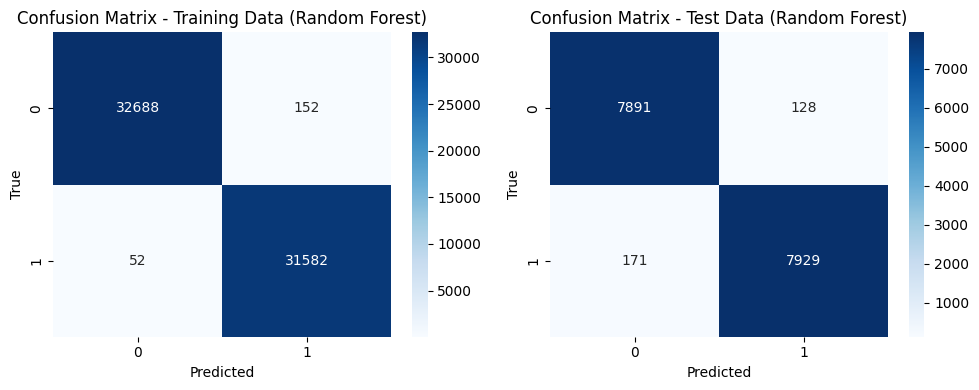

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_forest, classes=['0', '1'], title='Confusion Matrix - Training Data (Random Forest)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_forest, classes=['0', '1'], title='Confusion Matrix - Test Data (Random Forest)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [42]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest Classifier',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

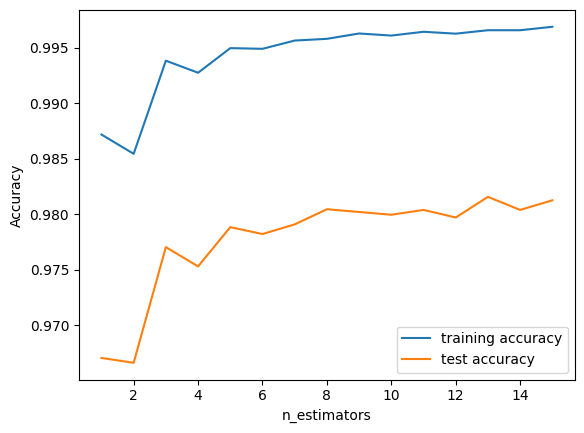

In [71]:
training_accuracy = []
test_accuracy = []
# try n_Estimators from 1 to 15
depth = range(1,16)
for n in depth:
    forest_test = RandomForestClassifier(n_estimators=n)
    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_estimators")
plt.legend();

## Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [45]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [46]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.982
Gradient Boosting Classifier : Accuracy on test Data: 0.977

Gradient Boosting Classifier : f1_score on training Data: 0.982
Gradient Boosting Classifier : f1_score on test Data: 0.977

Gradient Boosting Classifier : Recall on training Data: 0.983
Gradient Boosting Classifier : Recall on test Data: 0.977

Gradient Boosting Classifier : precision on training Data: 0.980
Gradient Boosting Classifier : precision on test Data: 0.977


In [47]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8019
           1       0.98      0.98      0.98      8100

    accuracy                           0.98     16119
   macro avg       0.98      0.98      0.98     16119
weighted avg       0.98      0.98      0.98     16119



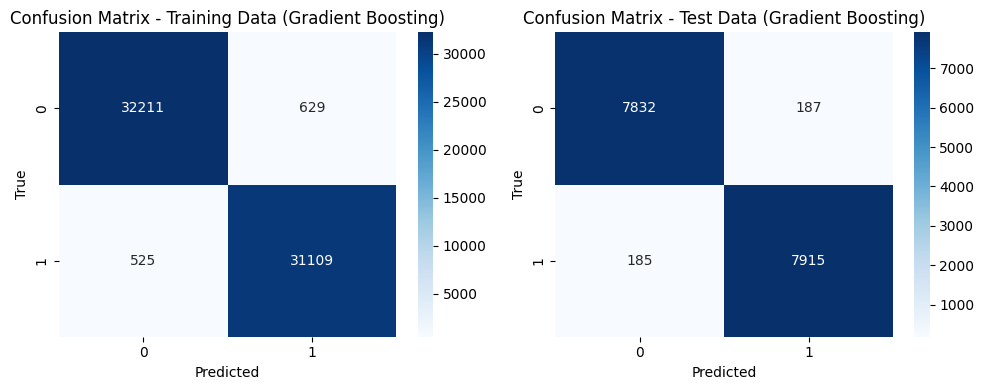

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_gbc, classes=['0', '1'], title='Confusion Matrix - Training Data (Gradient Boosting)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_gbc, classes=['0', '1'], title='Confusion Matrix - Test Data (Gradient Boosting)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [49]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

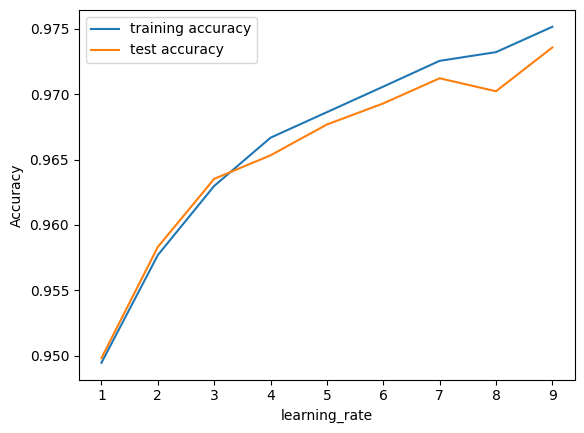

In [72]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("learning_rate")
plt.legend();

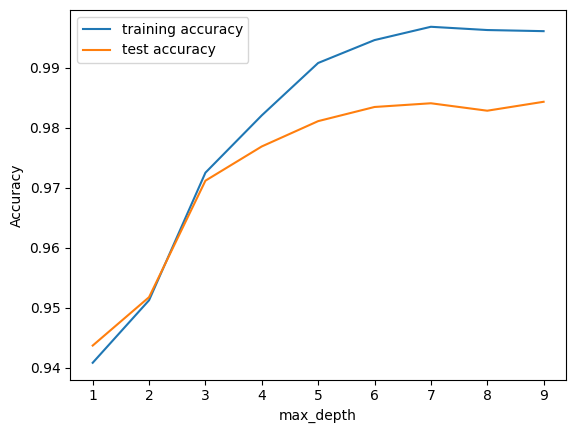

In [73]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))


#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend();

## Naive Bayes : Classifier

In [52]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB(var_smoothing=0.000000001)

# fit the model
nb.fit(X_train,y_train)

GaussianNB()

In [53]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [54]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.852
Naive Bayes Classifier : Accuracy on test Data: 0.855

Naive Bayes Classifier : f1_score on training Data: 0.848
Naive Bayes Classifier : f1_score on test Data: 0.853

Naive Bayes Classifier : Recall on training Data: 0.839
Naive Bayes Classifier : Recall on test Data: 0.841

Naive Bayes Classifier : precision on training Data: 0.857
Naive Bayes Classifier : precision on test Data: 0.866


In [55]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      8019
           1       0.87      0.84      0.85      8100

    accuracy                           0.85     16119
   macro avg       0.86      0.85      0.85     16119
weighted avg       0.86      0.85      0.85     16119



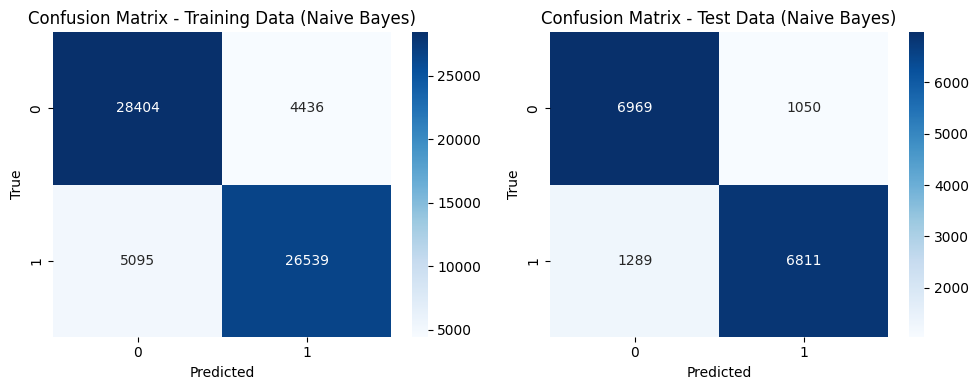

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Plotting Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=classes, yticklabels=classes, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(title)

# Create subplots for side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot confusion matrix for y_train logistic regression
plot_confusion_matrix(y_train, y_train_nb, classes=['0', '1'], title='Confusion Matrix - Training Data (Naive Bayes)', ax=axes[0])

# Plot confusion matrix for y_test logistic regression
plot_confusion_matrix(y_test, y_test_nb, classes=['0', '1'], title='Confusion Matrix - Test Data (Naive Bayes)', ax=axes[1])

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [57]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## Comparision of Models

In [58]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [59]:
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.908,0.909,0.917,0.888
1,K-Nearest Neighbors,0.978,0.978,0.996,0.996
2,Decision Tree Classifier,0.977,0.977,0.999,0.996
3,Random Forest Classifier,0.981,0.981,0.998,0.995
4,Gradient Boosting Classifier,0.977,0.977,0.983,0.980
5,Naive Bayes Classifier,0.855,0.853,0.839,0.857


In [60]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [61]:
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest Classifier,0.981,0.981,0.998,0.995
1,K-Nearest Neighbors,0.978,0.978,0.996,0.996
2,Decision Tree Classifier,0.977,0.977,0.999,0.996
3,Gradient Boosting Classifier,0.977,0.977,0.983,0.980
4,Logistic Regression,0.908,0.909,0.917,0.888
5,Naive Bayes Classifier,0.855,0.853,0.839,0.857


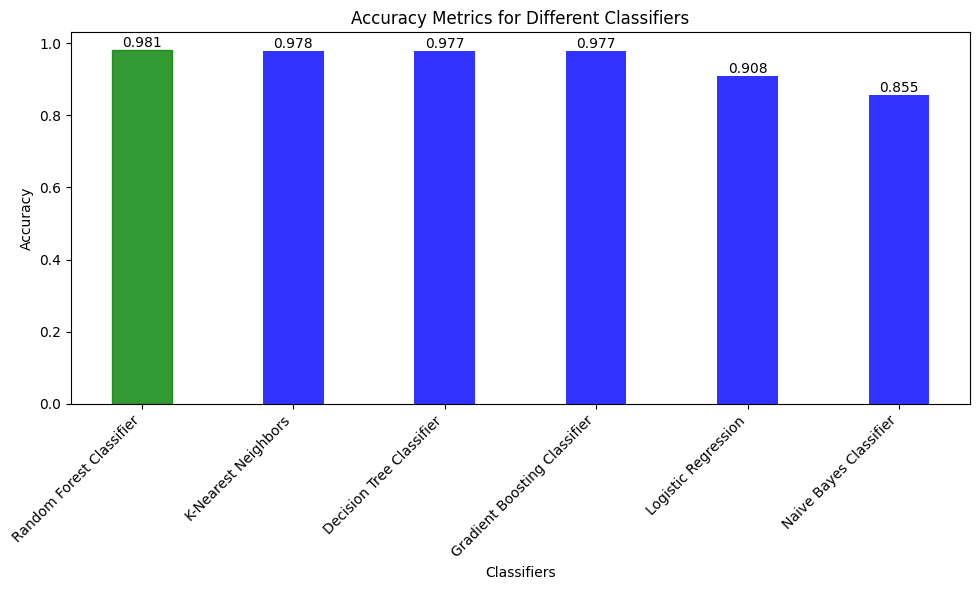

In [62]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy values
classifiers = [
    'Random Forest Classifier',
    'K-Nearest Neighbors',
    'Decision Tree Classifier',
    'Gradient Boosting Classifier',
    'Logistic Regression',
    'Naive Bayes Classifier'
]
accuracy = [sorted_result['Accuracy'][0], sorted_result['Accuracy'][1], sorted_result['Accuracy'][2], sorted_result['Accuracy'][3],
            sorted_result['Accuracy'][4], sorted_result['Accuracy'][5]]

# Plot the graph
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Adjust the width of the bars
opacity = 0.8  # Set the opacity level

# Plot the bars with labels inside
bars = plt.bar(classifiers, accuracy, color='blue', width=bar_width, alpha=opacity)

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Highlight the bar with the highest accuracy
highest_accuracy = max(accuracy)
highest_index = accuracy.index(highest_accuracy)
highest_bar = bars[highest_index]
highest_bar.set_color('green')

plt.title('Accuracy Metrics for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()  # Adjust spacing between the elements
plt.show()


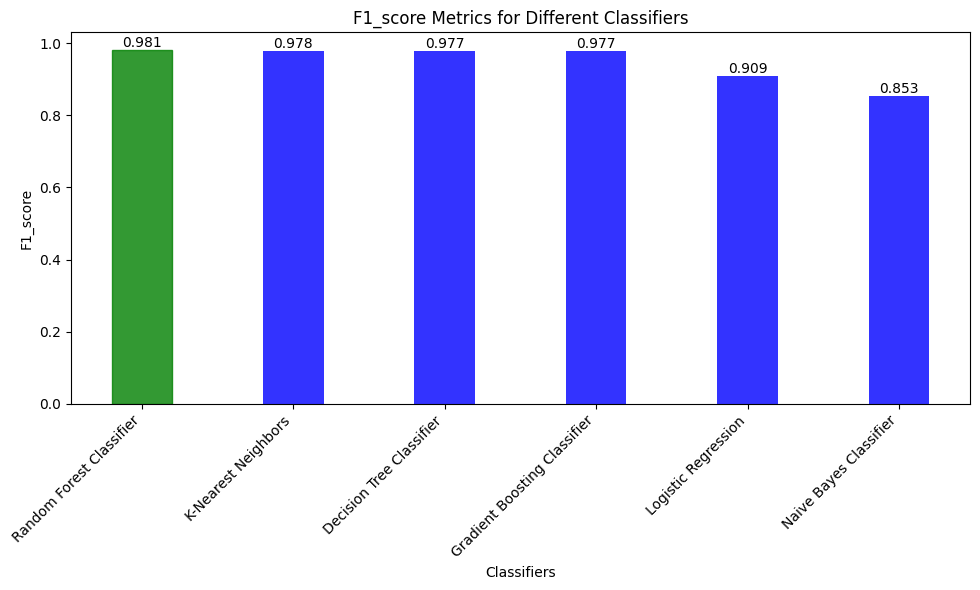

In [63]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy values
classifiers = [
    'Random Forest Classifier',
    'K-Nearest Neighbors',
    'Decision Tree Classifier',
    'Gradient Boosting Classifier',
    'Logistic Regression',
    'Naive Bayes Classifier'
]
f1_score = [sorted_result['f1_score'][0], sorted_result['f1_score'][1], sorted_result['f1_score'][2], sorted_result['f1_score'][3],
            sorted_result['f1_score'][4], sorted_result['f1_score'][5]]

# Plot the graph
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Adjust the width of the bars
opacity = 0.8  # Set the opacity level

# Plot the bars with labels inside
bars = plt.bar(classifiers, f1_score, color='blue', width=bar_width, alpha=opacity)

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Highlight the bar with the highest f1_score
highest_f1_score = max(f1_score)
highest_index = f1_score.index(highest_f1_score)
highest_bar = bars[highest_index]
highest_bar.set_color('green')

plt.title('F1_score Metrics for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('F1_score')
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()  # Adjust spacing between the elements
plt.show()


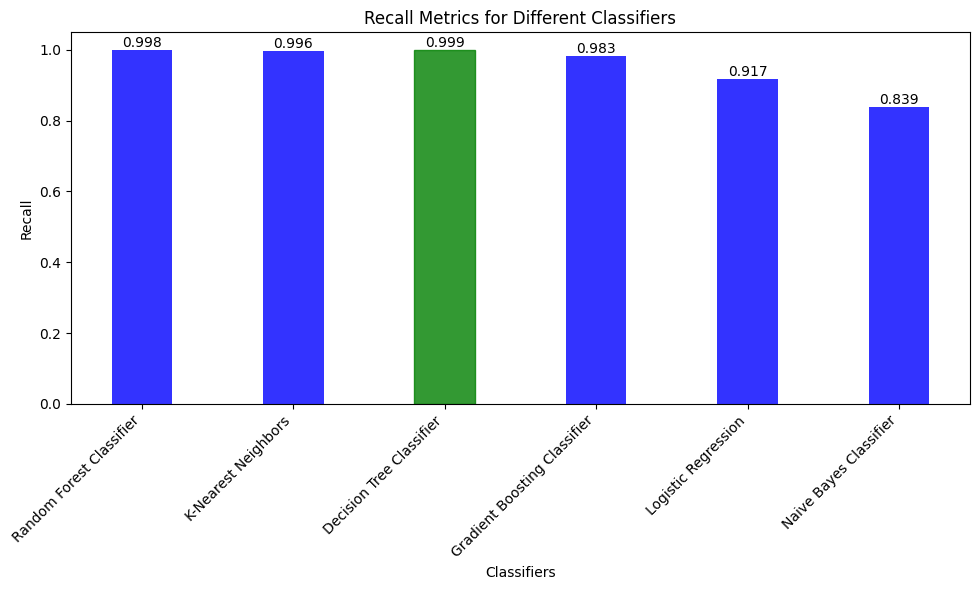

In [64]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy values
classifiers = [
    'Random Forest Classifier',
    'K-Nearest Neighbors',
    'Decision Tree Classifier',
    'Gradient Boosting Classifier',
    'Logistic Regression',
    'Naive Bayes Classifier'
]
Recall = [sorted_result['Recall'][0], sorted_result['Recall'][1], sorted_result['Recall'][2], sorted_result['Recall'][3],
            sorted_result['Recall'][4], sorted_result['Recall'][5]]

# Plot the graph
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Adjust the width of the bars
opacity = 0.8  # Set the opacity level

# Plot the bars with labels inside
bars = plt.bar(classifiers, Recall, color='blue', width=bar_width, alpha=opacity)

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Highlight the bar with the highest Recall
highest_Recall = max(Recall)
highest_index = Recall.index(highest_Recall)
highest_bar = bars[highest_index]
highest_bar.set_color('green')

plt.title('Recall Metrics for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Recall')
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()  # Adjust spacing between the elements
plt.show()


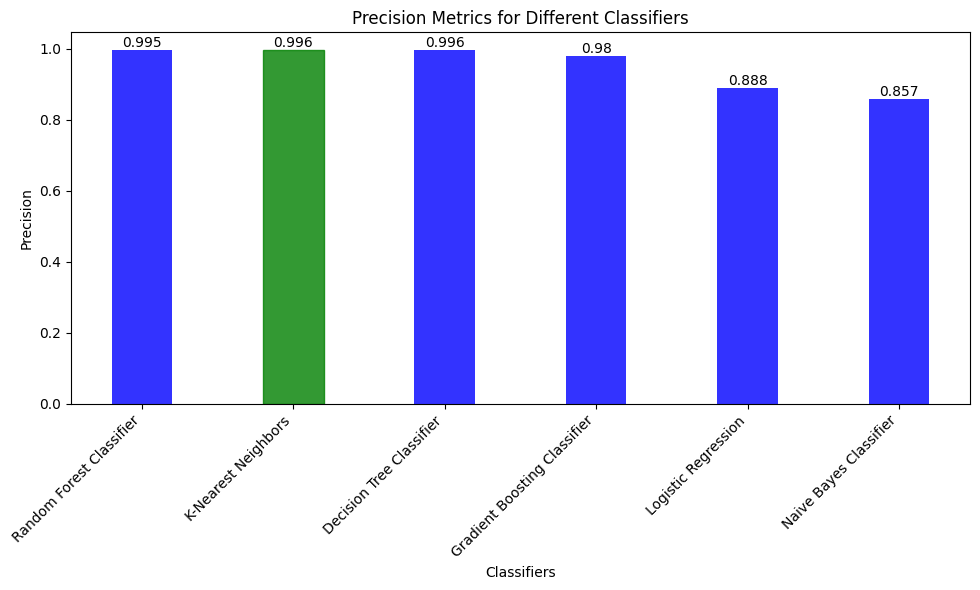

In [65]:
import matplotlib.pyplot as plt

# Define the classifiers and their accuracy values
classifiers = [
    'Random Forest Classifier',
    'K-Nearest Neighbors',
    'Decision Tree Classifier',
    'Gradient Boosting Classifier',
    'Logistic Regression',
    'Naive Bayes Classifier'
]
Precision = [sorted_result['Precision'][0], sorted_result['Precision'][1], sorted_result['Precision'][2], sorted_result['Precision'][3],
            sorted_result['Precision'][4], sorted_result['Precision'][5]]

# Plot the graph
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Adjust the width of the bars
opacity = 0.8  # Set the opacity level

# Plot the bars with labels inside
bars = plt.bar(classifiers, Precision, color='blue', width=bar_width, alpha=opacity)

# Add labels inside the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(bar.get_height()), ha='center', va='bottom')

# Highlight the bar with the highest Precision
highest_Precision = max(Precision)
highest_index = Precision.index(highest_Precision)
highest_bar = bars[highest_index]
highest_bar.set_color('green')

plt.title('Precision Metrics for Different Classifiers')
plt.xlabel('Classifiers')
plt.ylabel('Precision')
plt.xticks(rotation=45, ha='right')

# Display the graph
plt.tight_layout()  # Adjust spacing between the elements
plt.show()


## Storing Best Model

In [66]:
# import pickle
# from catboost import CatBoostClassifier


# # Save the CatBoost model as a pickle file
# with open("catboost_model.pkl", "wb") as f:
#     pickle.dump(cat, f)

In [67]:
# import pickle

# # Assuming you have already trained and named your Random Forest model as 'model'
# # Save the model to a file
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(forest, file) import pickle

# # Save the model to a file
# with open('random_forest_model.pkl', 'wb') as file:
#     pickle.dump(forest, file) # forest is the model name

